<h3>Importamos las bibliotecas</h3>
<p>
    <ol>
        <li>Pandas</li>
        <li>Matplot</li>
        <li>Numpy</li>
        <li>Seaborn</li>
    <ol/>
</p>

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<h3>Importamos nuestro Dataset</h3>
<p>
    <ol>
        <li>fcc-forum-pageviews</li>
    <ol/>
</p>

In [28]:
df=pd.read_csv("./Sets/fcc-forum-pageviews.csv")
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [29]:
#Desde .read_csv() Podemos convertir a date_time con parse_dates e inicializar nuestro index con la columna date con index_col.
#df=pd.read_csv("./Sets/fcc-forum-pageviews.csv",parse_dates=["date"], index_col="date")
df["date"]=pd.to_datetime(df["date"])

In [30]:
#Podemos convertir a date_time con parse_dates e inicializar nuestro index con la columna date con index_col.
#df=pd.read_csv("./Sets/fcc-forum-pageviews.csv",parse_dates=["date"], index_col="date")
df.set_index("date", inplace=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [31]:
# filtrando los días en los que las visitas a la página se encontraban en el 2,5% superior del conjunto de datos o en el 2,5% inferior del conjunto de datos.

df= df[(df["value"]>=df["value"].quantile(0.025)) & (df["value"]<=df["value"].quantile(0.975)) ]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0, 0.5, 'Page Views')

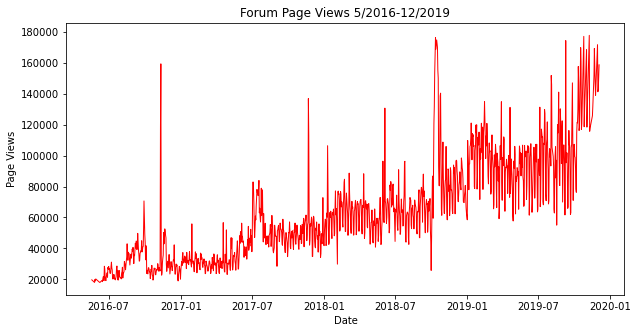

In [32]:
# Crea tu "canvas"
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(df.index, df["value"],"r", linewidth=1)

ax.set_title("Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")


In [33]:
#Copiamos y modificamos los datos para proyectar la gráfica de barras.
df["month"]=df.index.month
df["year"]=df.index.year
df_bar=df.groupby(["year","month"])["value"].mean()
df_bar=df_bar.unstack()




<ipython-input-33-0432215db1a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"]=df.index.month
<ipython-input-33-0432215db1a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"]=df.index.year


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

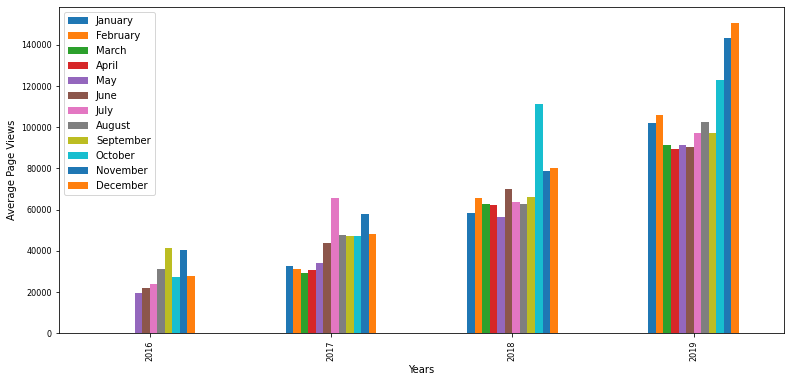

In [34]:
#Proyectamos nuestra gráfica de barras
fig=df_bar.plot.bar(legend=True, figsize=(13,6), ylabel="Average Page Views", xlabel="Years")
plt.legend(["January","February","March","April","May","June","July","August","September","October","November","December" ])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

In [35]:
#Preparamos los datos para proyectar Boxplot
df_box=df.copy()
df_box.reset_index(inplace=True)
df_box["year"]=[d.year for d in df_box.date]
df_box["month"]=[d.strftime("%b") for d in df_box.date]

Text(0, 0.5, 'Page views')

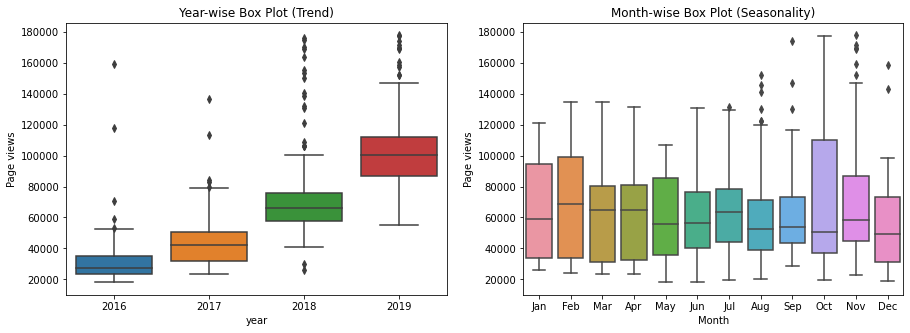

In [36]:
#Proyectamos nuestro Boxplot
df_box["month_num"]=df_box["date"].dt.month
df_box=df_box.sort_values("month_num")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0]=sns.boxplot(x=df_box["year"], y=df_box["value"], ax=axes[0])
axes[1]=sns.boxplot(x=df_box["month"], y=df_box["value"], ax=axes[1])

axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("year")
axes[0].set_ylabel("Page views")

axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page views")


